# prediksi popularitas tempat wisata di indonesia berdasarkan karakteristik

## Business Understanding
### Problem Statements

Menjelaskan pernyataan masalah latar belakang:
- bagaimana cara tempat wisata populer di indonesia berdasarkan data rating dan jumlah review
- bagaimana cara memanfaatkan data kategorikal (kategori dan provinsi) dalam membangun model klasifikasi popularitas

### Goals

Menjelaskan tujuan dari pernyataan masalah:
- Mengembangkan model klasifikasi untuk memprediksi apakah sebuah tempat wisata populer atau tidak
- menggunakan informasi kategori dan provinsi untuk memperkaya fitur input bagi model prediktif

# Data Understanding
adalah tahap proses analysis data yang bertujuan untuk memahami dataset secara mendalam
# data loading
Dataset yang digunakan dalam proyek ini adalah Dataset Tempat Wisata Indonesia yang berisi informasi komprehensif tentang destinasi wisata di seluruh Indonesia. Dataset ini dikumpulkan dengan scraping di Google Maps dan berisi 1.169 tempat wisata yang tersebar di 38 provinsi Indonesia.

**Sumber Dataset**:
- **Tautan**: [tempat_wisata_indonesia.csv](https://github.com/NusantaraGo/NusantaraGo-ML/blob/main/Scrape_Data/tempat_wisata_indonesia.csv)
- **Metode Pengumpulan**: Web scraping dari Google Maps

**Informasi Dataset**:
- **Jumlah data**: 1.169 tempat wisata
- **Jumlah kolom**: 11 kolom
- **Ukuran dataset**: (1169, 11)
- **Kondisi data**: Dataset relatif bersih dengan beberapa missing values


### import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE  # Untuk handle class imbalance
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import joblib
import ast

### load data

In [ ]:
df = pd.read_csv('tempat_wisata_indonesia.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1169 non-null   int64  
 1   nama           1169 non-null   object 
 2   alamat         1167 non-null   object 
 3   rating         1168 non-null   float64
 4   jumlah_review  1168 non-null   float64
 5   deskripsi      1169 non-null   object 
 6   koordinat      1169 non-null   object 
 7   url            1169 non-null   object 
 8   provinsi       1169 non-null   object 
 9   foto           1169 non-null   object 
 10  kategori       1169 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 100.6+ KB


### explore data

- id = nomor urutan
- nama = nama tempat
- alamat = alamat tempat
- rating = rating tempat
- jumlah review = jumlah review dari lokasi
- deskripsi = dekripsi tempat
- koordinat = titik lokasi
- url = link lokasi di maps
- provinsi = lokasi provinsi
- foto = foto lokasi
- kategori = kategori wisata

In [ ]:
df.isnull().sum()

,0
id,0
nama,0
alamat,2
rating,1
jumlah_review,1
deskripsi,0
koordinat,0
url,0
provinsi,0
foto,0


dapat kita lihat terdapat data yang kosong pada column alamat, rating, dan jumlah review

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1168
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1167 non-null   int64  
 1   nama           1167 non-null   object 
 2   alamat         1167 non-null   object 
 3   rating         1167 non-null   float64
 4   jumlah_review  1167 non-null   float64
 5   deskripsi      1167 non-null   object 
 6   koordinat      1167 non-null   object 
 7   url            1167 non-null   object 
 8   provinsi       1167 non-null   object 
 9   foto           1167 non-null   object 
 10  kategori       1167 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 109.4+ KB


setelah di hapus jumlah data menjadi (1167)

In [ ]:
df.drop(columns=['id', 'koordinat', 'url','foto'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1168
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama           1167 non-null   object 
 1   alamat         1167 non-null   object 
 2   rating         1167 non-null   float64
 3   jumlah_review  1167 non-null   float64
 4   deskripsi      1167 non-null   object 
 5   provinsi       1167 non-null   object 
 6   kategori       1167 non-null   object 
dtypes: float64(2), object(5)
memory usage: 72.9+ KB


menghapus column yang tidak dibutuhkan yaitu 1 int yaitu id dan 3 object yaitu koordinat, url, dan foto

In [ ]:
df.describe()

,rating,jumlah_review
count,1167.000000,1167.000000
mean,4.425878,184.203093
std,0.236684,240.327863
min,3.000000,1.000000
25%,4.300000,7.994000
50%,4.400000,77.000000
75%,4.600000,262.000000
max,5.000000,999.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

dapat kita lihat bahwa tidak ada duplikat pada data

#EDA(exploratory data analysis)

## eda multivariate

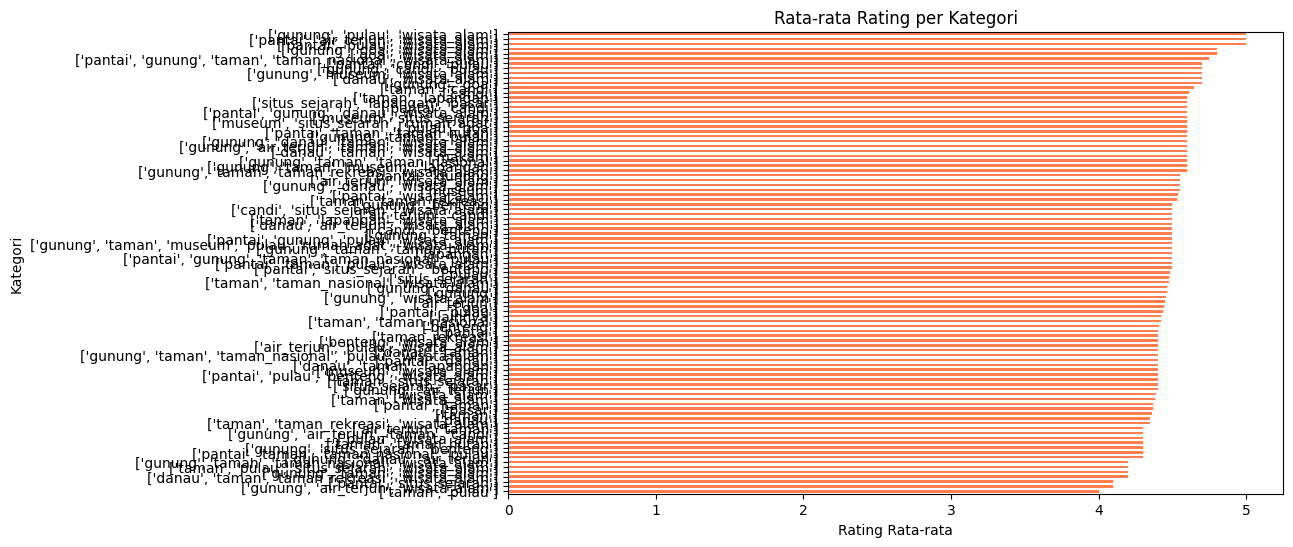

In [ ]:
kategori_exploded = df.explode('kategori')
mean_rating_kategori = kategori_exploded.groupby('kategori')['rating'].mean().sort_values()

plt.figure(figsize=(10,6))
mean_rating_kategori.plot(kind='barh', color='coral')
plt.title('Rata-rata Rating per Kategori')
plt.xlabel('Rating Rata-rata')
plt.ylabel('Kategori')
plt.show()

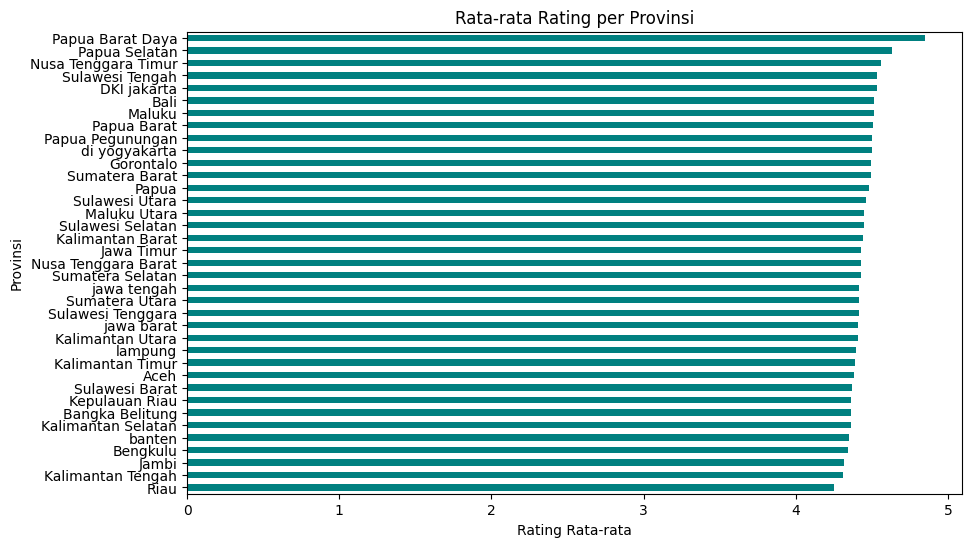

In [ ]:
# rata-rata rating per provinsi
mean_rating_prov = df.groupby('provinsi')['rating'].mean().sort_values()

plt.figure(figsize=(10,6))
mean_rating_prov.plot(kind='barh', color='teal')
plt.title('Rata-rata Rating per Provinsi')
plt.xlabel('Rating Rata-rata')
plt.ylabel('Provinsi')
plt.show()

## eda univariate

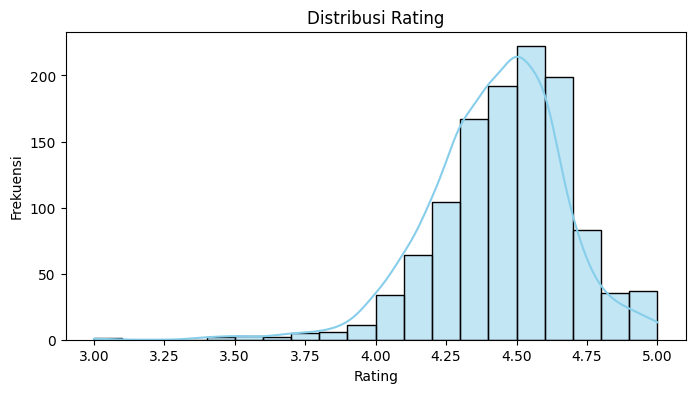

In [ ]:
#eda univariate
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-11-80b8a49a7a57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=kategori_list, order=kategori_list.value_counts().index, palette='cool')


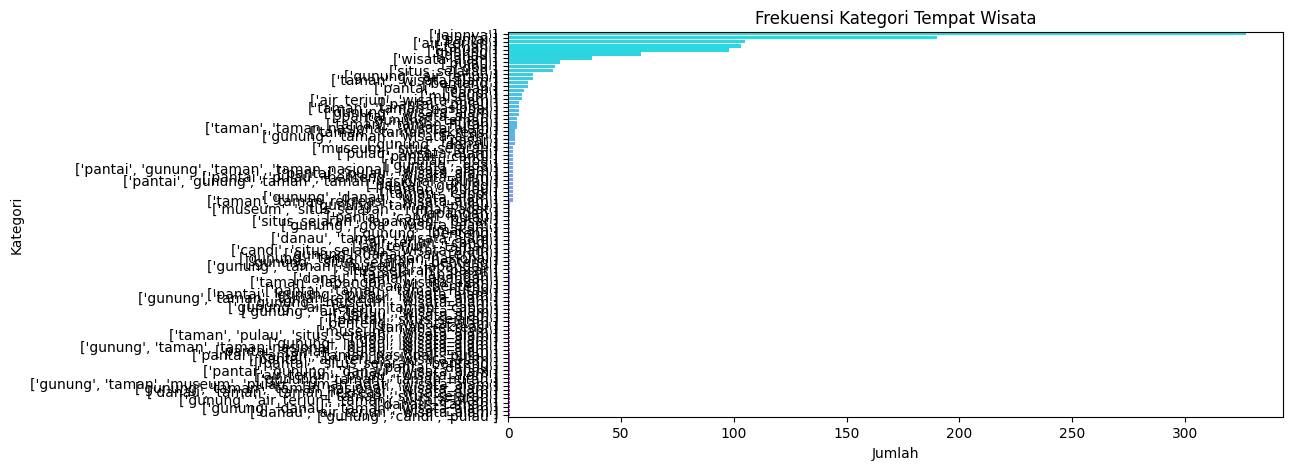

In [ ]:
plt.figure(figsize=(10,5))
kategori_list = df['kategori'].explode()
sns.countplot(y=kategori_list, order=kategori_list.value_counts().index, palette='cool')
plt.title('Frekuensi Kategori Tempat Wisata')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()

<ipython-input-12-74fe90e557f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['provinsi'], order=df['provinsi'].value_counts().index, palette='mako')


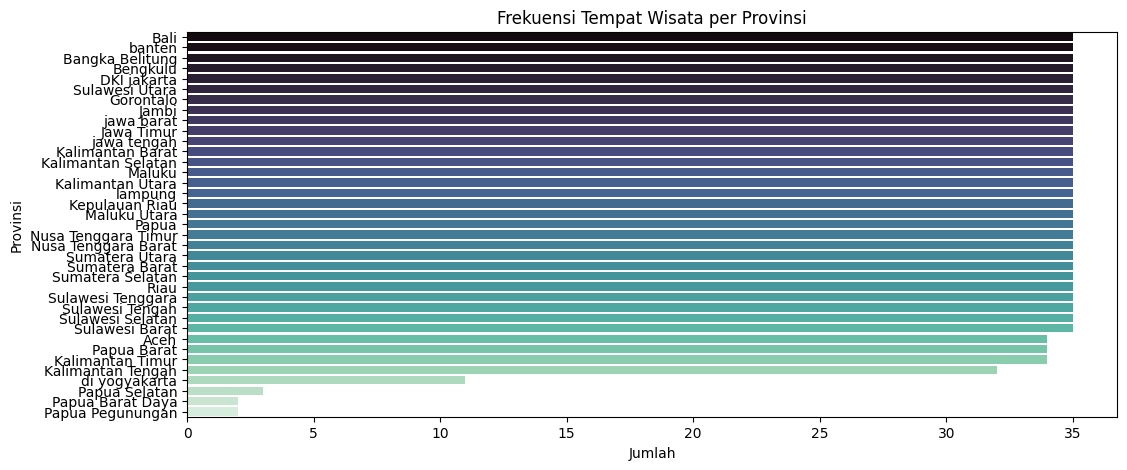

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(y=df['provinsi'], order=df['provinsi'].value_counts().index, palette='mako')
plt.title('Frekuensi Tempat Wisata per Provinsi')
plt.xlabel('Jumlah')
plt.ylabel('Provinsi')
plt.show()

## data preparation

In [ ]:
df['log_jumlah_review'] = np.log1p(df['jumlah_review'])

karena terjadinya outlier yang sangat extreme untuk menormalisasikannya saya menggunakan "log tranformasi" agar saya dapat mempertahankan data tersebut

In [ ]:
numerical = ['rating','jumlah_review','log_jumlah_review']
kategorical =['nama','alamat','deskripsi','provinsi','kategori']


memasukan colomn numerik ke varibel numerik dan memasukan colomn str/object ke kategorikal

In [ ]:
selected_cols = df[numerical]

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

menerapkan metode iqr untuk untuk membuang outlier dan memasukannya ke df_filtered

In [ ]:
def safe_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else []
    except:
      return []

df_filtered.loc[:, 'kategori'] = df_filtered['kategori'].apply(safe_eval)
print("Contoh data kategori:", df_filtered['kategori'].head())

Contoh data kategori: 3                   [pantai]
5                 [lapangan]
6               [air_terjun]
7    [museum, situs_sejarah]
8               [air_terjun]
Name: kategori, dtype: object


membuat fungsi untuk mengubah string yang di represetasikan oleh list python menjadi objek list python asli secara aman yang mana bertujuan untuk di proses lebih lanjut

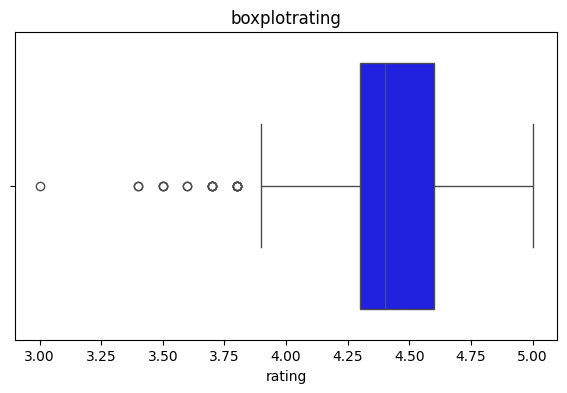

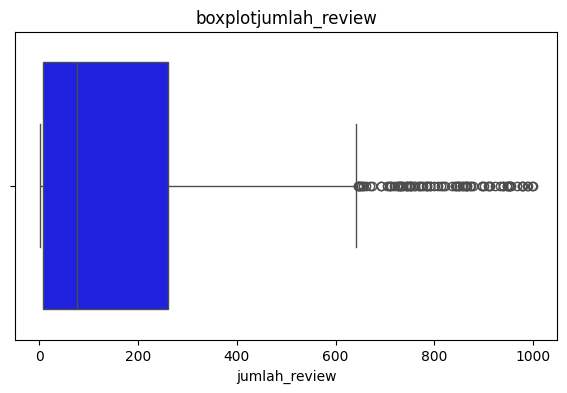

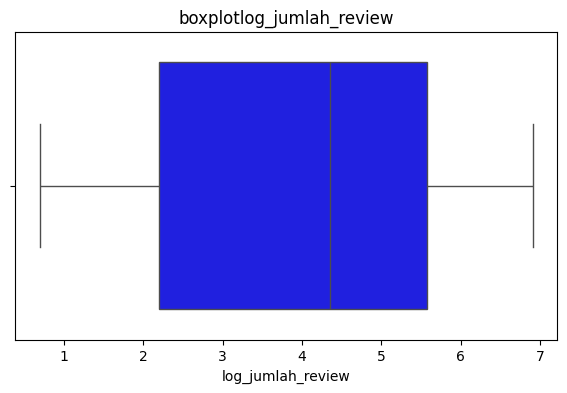

In [ ]:
for num in numerical:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x=num, color='blue')
    plt.title(f"boxplot{num}")
    plt.xlabel(num)
    plt.show()

melihat boxplot outlier pada numerikal

In [ ]:
df.describe()

,rating,jumlah_review,log_jumlah_review
count,1167.000000,1167.000000,1167.000000
mean,4.425878,184.203093,3.970031
std,0.236684,240.327863,1.915833
min,3.000000,1.000000,0.693147
25%,4.300000,7.994000,2.196557
50%,4.400000,77.000000,4.356709
75%,4.600000,262.000000,5.572154
max,5.000000,999.000000,6.907755


hasil yang lebih stabil dari rating dan log_jumlah_review

In [ ]:
mlb = MultiLabelBinarizer()

if df_filtered['kategori'].explode().notna().sum() > 0:
    kategori_encoded = mlb.fit_transform(df_filtered['kategori'])
    kategori_encoded_df = pd.DataFrame(kategori_encoded, columns=mlb.classes_)


    df_filtered = df_filtered.reset_index(drop=True)
    kategori_encoded_df = kategori_encoded_df.reset_index(drop=True)
    df_filtered = pd.concat([df_filtered, kategori_encoded_df], axis=1)
else:
    print(" Data kategori kosong atau tidak valid.")

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nama               1062 non-null   object 
 1   alamat             1062 non-null   object 
 2   rating             1062 non-null   float64
 3   jumlah_review      1062 non-null   float64
 4   deskripsi          1062 non-null   object 
 5   provinsi           1062 non-null   object 
 6   kategori           1062 non-null   object 
 7   log_jumlah_review  1062 non-null   float64
 8   air_terjun         1062 non-null   int64  
 9   benteng            1062 non-null   int64  
 10  candi              1062 non-null   int64  
 11  danau              1062 non-null   int64  
 12  goa                1062 non-null   int64  
 13  gunung             1062 non-null   int64  
 14  lainnya            1062 non-null   int64  
 15  lapangan           1062 non-null   int64  
 16  makam              1062 

dari hasil fungsi safe_eval sebelumnya pada column kategori lalu di ubah mejadi fitur numerik menggunakan one hot encoding via multilabelbinarizerr kemudian di gabung pada data df_filtered

In [ ]:
provinsi_encoded = pd.get_dummies(df_filtered['provinsi'], prefix='provinsi')

#gabungkan ke df_filtered
df_filtered = pd.concat([df_filtered, provinsi_encoded],axis = 1)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nama                          1062 non-null   object 
 1   alamat                        1062 non-null   object 
 2   rating                        1062 non-null   float64
 3   jumlah_review                 1062 non-null   float64
 4   deskripsi                     1062 non-null   object 
 5   provinsi                      1062 non-null   object 
 6   kategori                      1062 non-null   object 
 7   log_jumlah_review             1062 non-null   float64
 8   air_terjun                    1062 non-null   int64  
 9   benteng                       1062 non-null   int64  
 10  candi                         1062 non-null   int64  
 11  danau                         1062 non-null   int64  
 12  goa                           1062 non-null   int64  
 13  gun

mengubah column provinsi menjadi fitur numerik menggunakan one hot encoding dan digabungkan pada data df_filtered

In [ ]:
# hitung threshold berdasarkan percentile
rating_threshold = df_filtered['rating'].quantile(0.7)  # Top 30% rating
review_threshold = df_filtered['jumlah_review'].quantile(0.7)  # Top 30% review

# Gabungan kriteria rating DAN jumlah review (lebih strict)
df_filtered['populer'] = ((df_filtered['rating'] >= rating_threshold) |
                          (df_filtered['jumlah_review'] >= review_threshold)).astype(int)

# Cek distribusi kelas
print("\nDistribusi Kelas Popularitas:")
print(df_filtered['populer'].value_counts(normalize=True))


Distribusi Kelas Popularitas:
populer
1    0.551789
0    0.448211
Name: proportion, dtype: float64


mengubah masalah regresi (rating dan review) menjadi masalah klasifikasi biner dengan :
- 1 = populer
- 0 = tidak populer

In [ ]:
features = ["log_jumlah_review"] + list(mlb.classes_) + list(provinsi_encoded.columns)

x = pd.concat([df_filtered[["log_jumlah_review"]], kategori_encoded_df, provinsi_encoded], axis=1)
y = df_filtered["populer"]

menyiapkan data x dan y yang akan di masukan ke dalam model klasifikasi

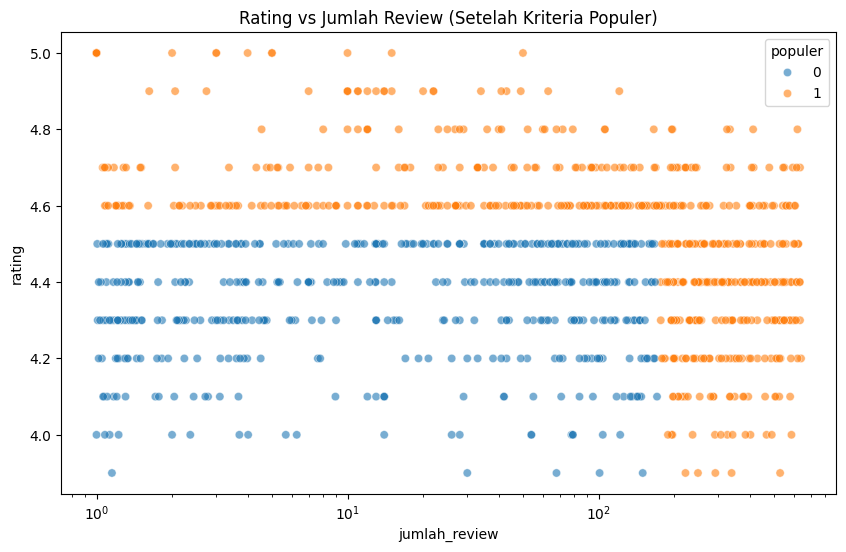

In [ ]:
# 3. Visualisasi Kriteria Popularitas
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='jumlah_review', y='rating', hue='populer', alpha=0.6)
plt.xscale('log')
plt.title('Rating vs Jumlah Review (Setelah Kriteria Populer)')
plt.show()

visualisasi hasil dari hasil rating dan jumlah review

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

split data

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

menggunakan smote untuk menangani imbalanced

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


saya melakukan standarscale karena saya akan menggunnakannya pada knn, svm, logistic regression

In [ ]:
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
models = {
    "Random Forest": (RandomForestClassifier(
        class_weight='balanced',
        max_depth=5,
        n_estimators=100
    ), False),

    "KNN": (make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(weights='distance')  # Beri bobot oleh distance
    ), True),

    "SVM": (make_pipeline(
        StandardScaler(),
        SVC(class_weight='balanced', probability=True)
    ), True),

    "Logistic Regression": (make_pipeline(
        StandardScaler(),
        LogisticRegression(class_weight='balanced', max_iter=1000)
    ), True),

    "Decision Tree": (DecisionTreeClassifier(
        class_weight='balanced',
        max_depth=3
    ), False)
}

print("evaluasi model :")
print("="*20)

for name, (model, use_scaling) in models.items():
    print(f"model : {name}")
    if use_scaling:
      model.fit(X_train_resampled, y_train_resampled)
      y_pred = model.predict(X_test_scaled)
    else:
      model.fit(X_train_resampled, y_train_resampled)
      y_pred = model.predict(X_test)

    print("akurasi : ", accuracy_score(y_test, y_pred))
    print("f1_score : ", f1_score(y_test, y_pred) )
    print("clasifikasi report : \n", classification_report(y_test, y_pred))
    print("="*20)

    if name == "Random Forest":
      joblib.dump(model, "prediksi_popularitas.joblib")
      joblib.dump(scaler, "scaler_popularitas.joblib")
      joblib.dump(x.columns.tolist(), "features_popularis.joblib")
      joblib.dump(mlb, "mlb_populairatas.joblib")
      print("model berhasil disimpan")


evaluasi model :
model : Random Forest
akurasi :  0.7887323943661971
f1_score :  0.7567567567567568
clasifikasi report : 
               precision    recall  f1-score   support

           0       0.70      0.98      0.81       100
           1       0.97      0.62      0.76       113

    accuracy                           0.79       213
   macro avg       0.83      0.80      0.79       213
weighted avg       0.84      0.79      0.78       213

model berhasil disimpan
model : KNN
akurasi :  0.5915492957746479
f1_score :  0.5347593582887701
clasifikasi report : 
               precision    recall  f1-score   support

           0       0.55      0.76      0.64       100
           1       0.68      0.44      0.53       113

    accuracy                           0.59       213
   macro avg       0.61      0.60      0.59       213
weighted avg       0.62      0.59      0.58       213

model : SVM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


akurasi :  0.4694835680751174
f1_score :  0.0
clasifikasi report : 
               precision    recall  f1-score   support

           0       0.47      1.00      0.64       100
           1       0.00      0.00      0.00       113

    accuracy                           0.47       213
   macro avg       0.23      0.50      0.32       213
weighted avg       0.22      0.47      0.30       213

model : Logistic Regression
akurasi :  0.568075117370892
f1_score :  0.5053763440860215
clasifikasi report : 
               precision    recall  f1-score   support

           0       0.53      0.74      0.62       100
           1       0.64      0.42      0.51       113

    accuracy                           0.57       213
   macro avg       0.59      0.58      0.56       213
weighted avg       0.59      0.57      0.56       213

model : Decision Tree
akurasi :  0.7699530516431925
f1_score :  0.73224043715847
clasifikasi report : 
               precision    recall  f1-score   support

       

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predict

1. Melatih dan mengevaluasi 5 algoritma klasifikasi.
- svm, knn, dan logistic regression karena model-model ini sensitif terhadap fitur yang telah di normalisasikan/di standarisasikan
  - svm = mengandalkan margin antar titik data untuk mencari hyperplane terbaik sehingga fitur dengan skala besar akan lebih dominan, dan bisa mernjadi bias ke fitur tertentu
  - knn = menggunakan jarak yang euclidian antar titik yang membuat fitur skala besar akan lebih dominan
  - logistic regression = menghitung kombinasi linear dari fitur dan memetakan probabilitas, jika skala fitur jauh berbeda konveregensi saat training bisa terganggu
-random forest dan decision tree tidak membutuhkan standarisasi karena model berbasis pohon keputusan yang membagi data menggunakan nilai thershold oleh karena itu model tersebut tidak membutuhkan normalisasi/standarisasi
  - random forest = enseble dari banyak decission tree/banyak pohon yang digabungkan untuk mendapatkan hasil terbaik
  - algoritma berbasis pohon keputusan dengan satu pohon saja

2. Menampilkan hasil evaluasi menggunakan metrik:
  - Accuracy
  - F1-Score
  - Classification Report (Precision, Recall, F1, Support)

3. Menyimpan model terbaik (Random Forest) dan komponen penting lainnya.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


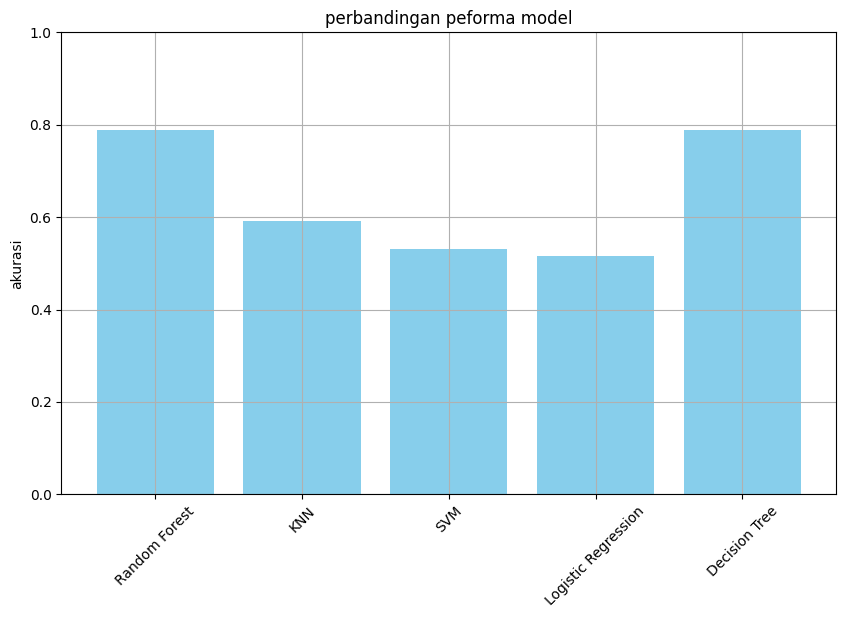

In [ ]:
model_names = []
akurasi = []

for name, (model, use_scaling) in models.items():
    model_names.append(name)
    if use_scaling:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    akurasi.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.bar(model_names, akurasi, color='skyblue')
plt.ylabel('akurasi')
plt.title('perbandingan peforma model')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.grid(True)
plt.show()

perbandingan evaluasi pada model

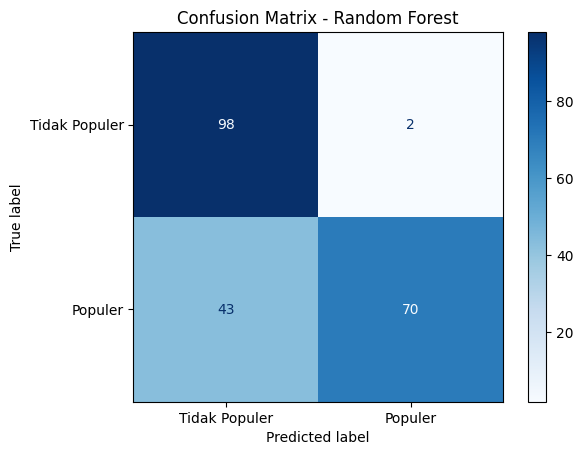

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


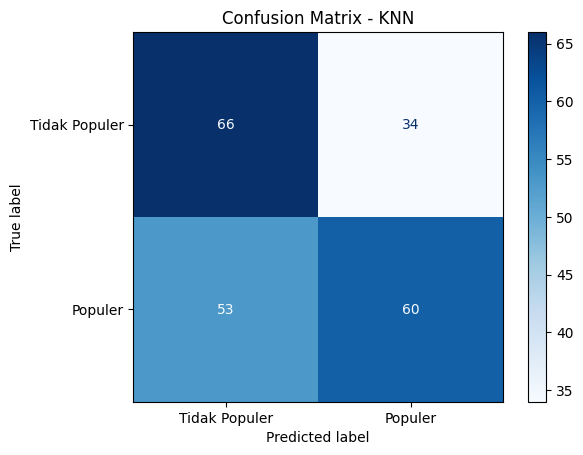

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


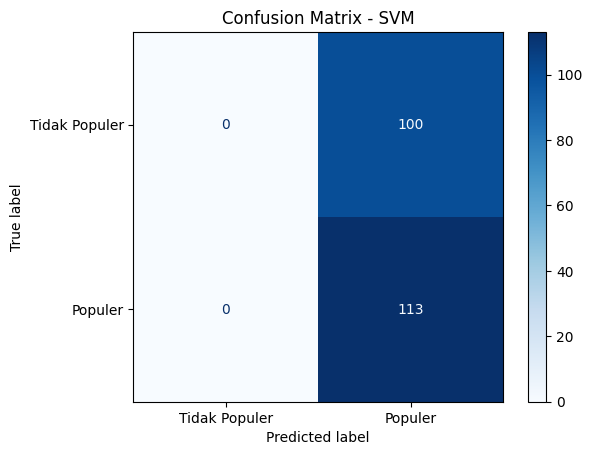

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


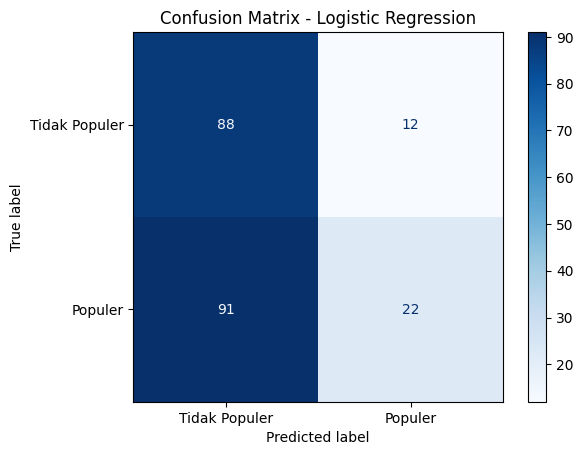

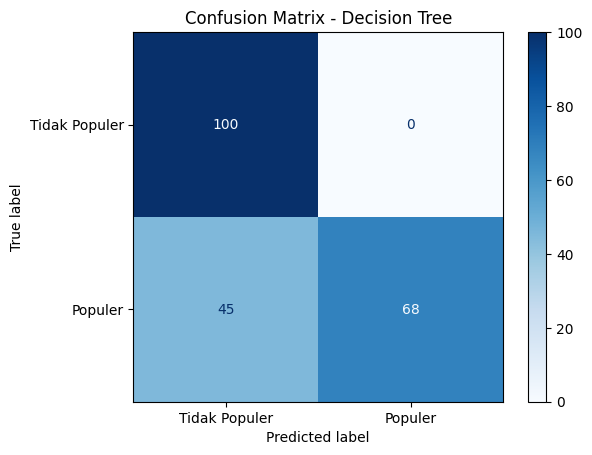

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, (model, use_scaling) in models.items():
    if use_scaling:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Populer', 'Populer'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


- random forest = pada tp hanya 2, maksudnya dari total kesalahan hanya 2 yang populer itu salah, akan tetapi fp 43 dari 113 data populer ini salah
- knn = pada tp terdapat 34 kesalahan, yang mana ini mampu mendeteksi data populer tetapi banyak masalah, dan model ini kurang efektif
- svm = pada model ini sangat bermasalah karena fp terdapat 100 yang mana ini maksudnya model tidak mengenali tidak populer sama sekali
- logistic regresion = pada model ini fn 91 yang mana model tidak mengenali populer sama sekali karena model condong di tidak populer
- decision tree = pada model ini fn 0, maksudnya model membaca 100% akurat untuk tidak populer akan tetapi masih bermasalah pada fn masih terdapat masalah 45 data klasifikasi yang salah

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


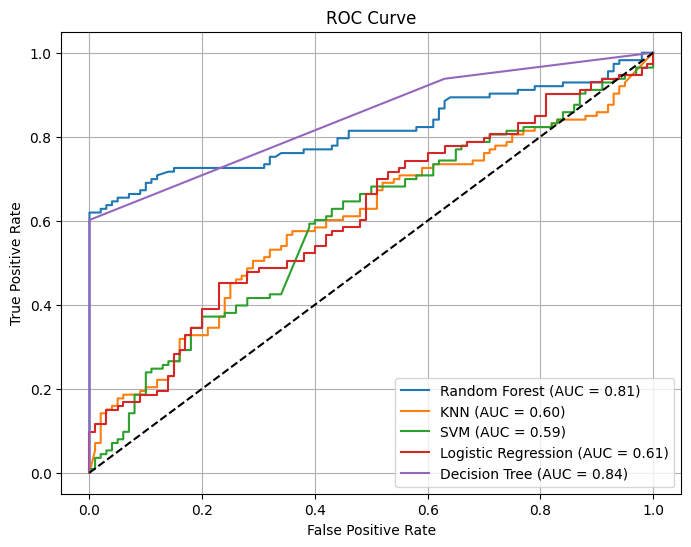

In [ ]:
# roc curve dan auc score
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for name, (model, use_scaling) in models.items():
    if hasattr(model, "predict_proba"):
        if use_scaling:
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_proba = model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


| Model                   | AUC      | Evaluasi                                                            |
| ----------------------- | -------- | ------------------------------------------------------------------- |
| **Decision Tree**       | **0.84** | **Terbaik** dalam membedakan kelas, sangat baik untuk klasifikasi.  |
| **Random Forest**       | 0.81     | Hampir sebaik Decision Tree, performa stabil dan kuat.              |
| **Logistic Regression** | 0.61     | Di atas tebakan acak, tapi jauh lebih rendah dari model tree-based. |
| **KNN**                 | 0.60     | Performa buruk, hanya sedikit lebih baik dari tebakan acak.         |
| **SVM**                 | 0.59     | Hampir sama seperti KNN, **sangat tidak optimal** pada dataset ini. |
